# Presentation: Statistical Learning Course
### Name: ONOJA Anthony PhD Data Science, Scuola Normale Superiore, Pisa, Italy

##### Importing necessary libraries

In [1]:
# Import all the necessary libraries for the analysis 
# Import all the necessary libraries for the analysis 

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
import scipy

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
import scipy

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Getting the dataset
df = pd.read_csv("d123.csv")

In [3]:
df.head(5)

,country,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,annual_CO2_emissions,inform_risk,...,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,total_no_cases_COVID_19,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
0,Austria,4.4,4.2,50.4,4.9,6.2,14.61,107.21,6.875231e+07,1.6,...,0.1,2.3,51.44,5295.18,11525,13.50,20.45,47.15,168,2
1,Belgium,4.3,4.0,48.8,5.3,14.2,8.22,377.21,1.178913e+08,1.9,...,0.1,1.7,33.23,4667.88,16770,13.00,24.55,47.95,1143,3
2,Bulgaria,2.7,4.6,44.6,6.4,8.9,9.02,64.70,5.198726e+07,2.4,...,0.2,3.1,39.88,1577.94,485,13.90,16.80,46.70,14,1
3,Croatia,3.0,4.2,41.9,7.1,9.1,12.12,73.08,2.008192e+07,2.1,...,0.1,3.0,29.96,1705.21,1079,14.03,20.00,48.15,8,1
4,Cyprus,4.3,2.1,49.2,6.1,4.2,18.58,128.71,6.967179e+06,3.0,...,0.1,1.6,19.51,2270.83,396,11.37,31.20,48.30,11,1


In [4]:
print(df.size)
print(df.shape)

713
(31, 23)


In [5]:
print(df.columns)

Index(['country', 'asthma', 'chronic_lower_respiratory_diseases', 'BMI',
       'diabetes', 'everyday_alcohol', 'longstanding_health_issues',
       'population_density', 'annual_CO2_emissions', 'inform_risk',
       'population_living_urban_areas', 'basic_sanitation_services',
       'inform_vulnerability', 'inform_health_condition',
       'epidemic_lack_coping_capacity', 'physicians_density',
       'current_health_expenditure_per_capita', 'total_no_cases_COVID_19',
       'Age_average', 'Body_pain', 'Smoking_average', 'total_deaths_COVID_19',
       'Risk_status'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 23 columns):
country                                  31 non-null object
asthma                                   31 non-null float64
chronic_lower_respiratory_diseases       31 non-null float64
BMI                                      31 non-null float64
diabetes                                 31 non-null float64
everyday_alcohol                         29 non-null float64
longstanding_health_issues               31 non-null float64
population_density                       31 non-null float64
annual_CO2_emissions                     31 non-null float64
inform_risk                              31 non-null float64
population_living_urban_areas            31 non-null float64
basic_sanitation_services                31 non-null float64
inform_vulnerability                     31 non-null float64
inform_health_condition                  31 non-null float64
epidemic_lack_coping_capacity            31 

In [7]:
# Get some decriptive statistics (count, mean, std, minimum, maximum, 25%, 50% and 75% percentiles)
df.describe()

,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,annual_CO2_emissions,inform_risk,population_living_urban_areas,...,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,total_no_cases_COVID_19,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
count,31.000000,31.000000,31.000000,31.000000,29.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.461290,3.790323,45.729032,6.416129,6.758621,14.757419,172.274516,1.424099e+08,1.883871,74.321290,...,0.212903,3.477419,35.053548,3401.989677,17386.903226,12.835484,20.980645,47.404839,1334.129032,1.677419
std,2.124567,1.523670,3.562227,1.651887,5.472628,6.145550,271.164927,1.973065e+08,0.884721,13.331147,...,0.172708,2.030223,8.808220,1636.306859,32732.745020,1.418442,4.166287,0.779354,3367.827378,0.832150
min,2.000000,1.100000,38.000000,4.200000,0.500000,1.980000,3.530000,2.414536e+06,0.600000,53.730000,...,0.100000,0.900000,17.610000,1089.240000,202.000000,7.930000,14.150000,46.300000,0.000000,1.000000
25%,4.200000,2.650000,43.000000,4.850000,2.100000,11.615000,71.765000,3.033397e+07,1.300000,64.190000,...,0.100000,2.000000,30.115000,1975.440000,1020.000000,12.385000,17.500000,46.700000,17.000000,1.000000
50%,4.900000,3.900000,44.600000,6.400000,6.900000,13.870000,107.210000,5.672454e+07,1.700000,75.010000,...,0.200000,3.000000,33.360000,3259.800000,3383.000000,13.030000,20.950000,47.350000,59.000000,1.000000
75%,6.750000,4.850000,49.500000,7.450000,9.300000,18.895000,137.835000,1.482315e+08,2.250000,84.390000,...,0.250000,5.300000,40.810000,4937.635000,13624.000000,13.850000,23.625000,47.975000,379.000000,2.000000
max,9.400000,7.700000,52.500000,10.000000,24.200000,27.920000,1511.030000,8.850663e+08,5.000000,98.000000,...,0.800000,8.200000,54.000000,6374.200000,119827.000000,14.930000,31.200000,49.150000,14681.000000,3.000000


C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

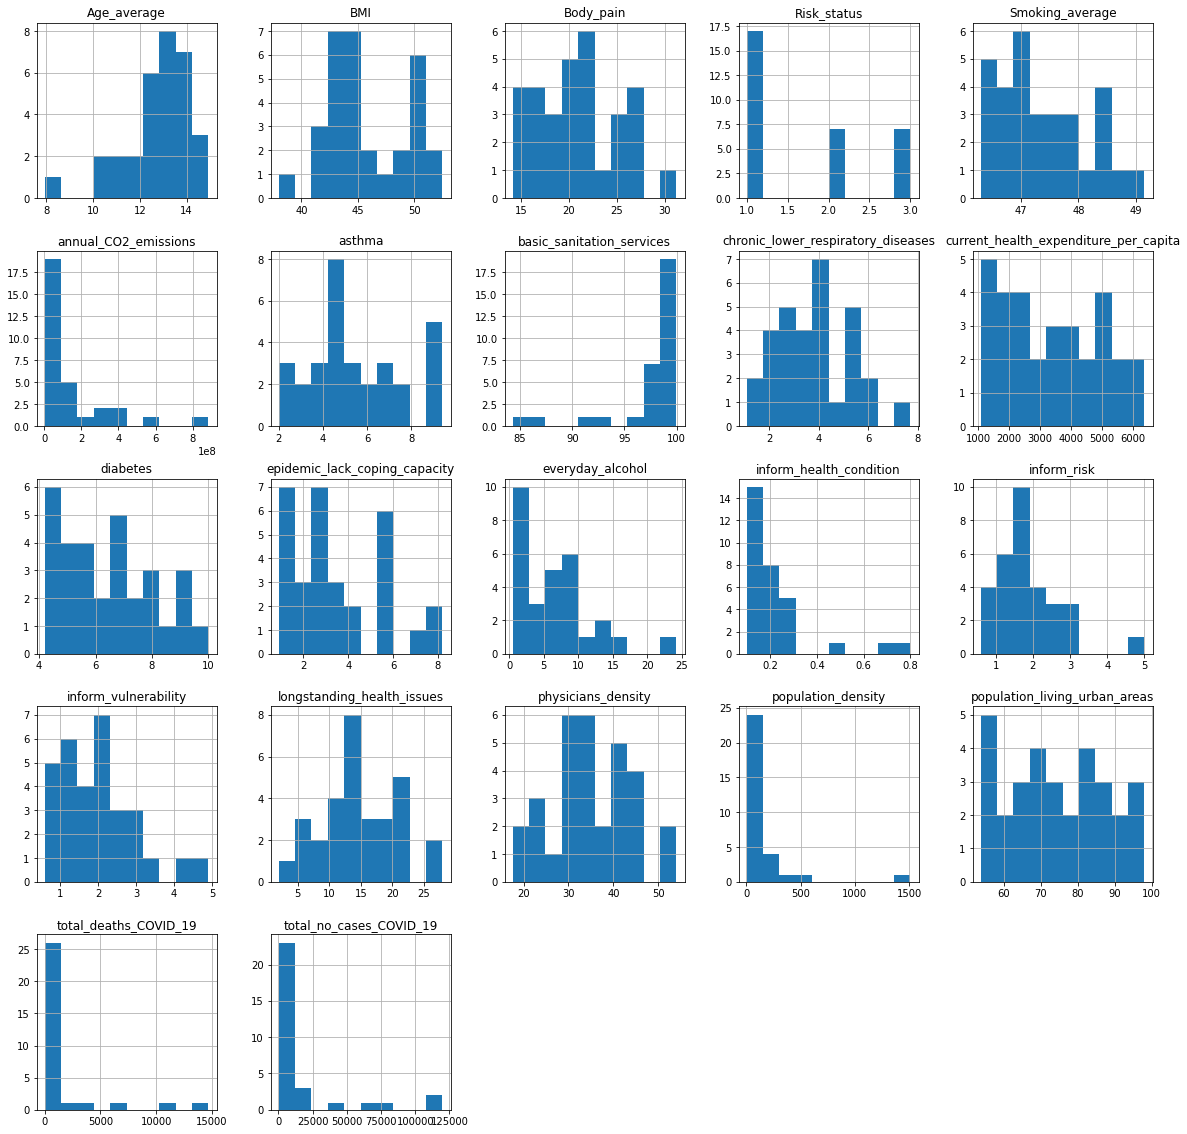

In [8]:
# Visually the dataset by plotting histogram
df.hist(figsize=(20,20))
plt.show()

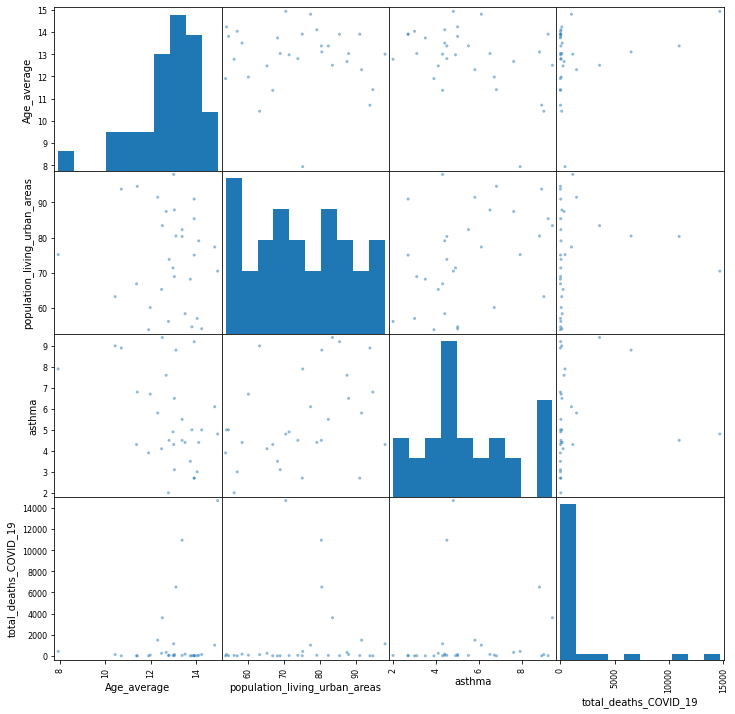

In [9]:
# plot some variables using scatter plot to visualize 
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(df[['Age_average', 'population_living_urban_areas', 
                               'asthma', 'total_deaths_COVID_19']],figsize=(12,12))
plt.show()

In [10]:
# Checking for missing observations 
df.isnull().any()

country                                  False
asthma                                   False
chronic_lower_respiratory_diseases       False
BMI                                      False
diabetes                                 False
everyday_alcohol                          True
longstanding_health_issues               False
population_density                       False
annual_CO2_emissions                     False
inform_risk                              False
population_living_urban_areas            False
basic_sanitation_services                False
inform_vulnerability                     False
inform_health_condition                  False
epidemic_lack_coping_capacity            False
physicians_density                       False
current_health_expenditure_per_capita    False
total_no_cases_COVID_19                  False
Age_average                              False
Body_pain                                False
Smoking_average                          False
total_deaths_

In [11]:
# Filling Missing observations in Continuous variables in the dataset:
df.fillna(df.mean(), inplace=True)

In [12]:
# We want to know how well does each feature correlate the variables
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,annual_CO2_emissions,inform_risk,population_living_urban_areas,...,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,total_no_cases_COVID_19,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
asthma,1.000000,0.054043,0.096566,0.084810,-0.147059,0.513836,0.098226,0.317498,-0.075535,0.382349,...,-0.242964,-0.287844,0.025440,0.388686,0.121512,-0.428521,-0.085986,-0.309705,0.079143,0.324535
chronic_lower_respiratory_diseases,0.054043,1.000000,0.189024,0.254077,0.210834,-0.162761,0.155225,0.194608,0.359419,0.080356,...,-0.015977,0.460910,-0.152591,0.031835,0.211765,-0.003645,0.008896,0.062498,0.129104,0.078954
BMI,0.096566,0.189024,1.000000,-0.301104,0.236808,0.044761,0.171848,0.169913,-0.038240,0.114315,...,-0.080817,0.186945,0.319349,0.308971,0.312953,0.171179,0.039524,-0.262878,0.331492,0.192179
diabetes,0.084810,0.254077,-0.301104,1.000000,0.356030,0.142397,-0.034761,0.262512,0.448138,-0.096490,...,-0.086046,0.087379,-0.193848,-0.295537,0.229300,0.092658,0.178356,0.307015,0.191885,0.224579
everyday_alcohol,-0.147059,0.210834,0.236808,0.356030,1.000000,-0.132978,0.192346,0.231154,0.166213,-0.007506,...,-0.022545,0.192331,0.100493,-0.066341,0.394478,0.466916,0.129498,0.334380,0.397537,0.423416
longstanding_health_issues,0.513836,-0.162761,0.044761,0.142397,-0.132978,1.000000,-0.096031,0.198311,-0.319891,0.168489,...,0.086052,-0.419566,0.025209,0.285534,-0.019842,-0.045986,0.055763,0.048772,-0.131072,0.173277
population_density,0.098226,0.155225,0.171848,-0.034761,0.192346,-0.096031,1.000000,0.033798,0.007982,0.401503,...,-0.207773,0.126274,0.009332,0.144966,0.011210,-0.150361,-0.196775,0.037837,0.011460,0.099148
annual_CO2_emissions,0.317498,0.194608,0.169913,0.262512,0.231154,0.198311,0.033798,1.000000,0.235338,0.093317,...,-0.067894,0.085262,0.000035,0.182387,0.729781,0.169018,0.082176,0.067936,0.488889,0.674683
inform_risk,-0.075535,0.359419,-0.038240,0.448138,0.166213,-0.319891,0.007982,0.235338,1.000000,-0.213120,...,-0.112032,0.069197,-0.396533,-0.522030,0.220775,-0.327702,0.447688,0.231440,0.187835,0.173803
population_living_urban_areas,0.382349,0.080356,0.114315,-0.096490,-0.007506,0.168489,0.401503,0.093317,-0.213120,1.000000,...,-0.173783,-0.235416,0.383677,0.582686,0.126139,-0.090645,-0.134466,-0.065394,0.098992,0.279962


In [13]:
df.corr()['total_deaths_COVID_19']

asthma                                   0.079143
chronic_lower_respiratory_diseases       0.129104
BMI                                      0.331492
diabetes                                 0.191885
everyday_alcohol                         0.397537
longstanding_health_issues              -0.131072
population_density                       0.011460
annual_CO2_emissions                     0.488889
inform_risk                              0.187835
population_living_urban_areas            0.098992
basic_sanitation_services                0.167354
inform_vulnerability                     0.174479
inform_health_condition                  0.068406
epidemic_lack_coping_capacity            0.432388
physicians_density                       0.124520
current_health_expenditure_per_capita    0.100934
total_no_cases_COVID_19                  0.914647
Age_average                              0.254094
Body_pain                                0.143373
Smoking_average                          0.257121


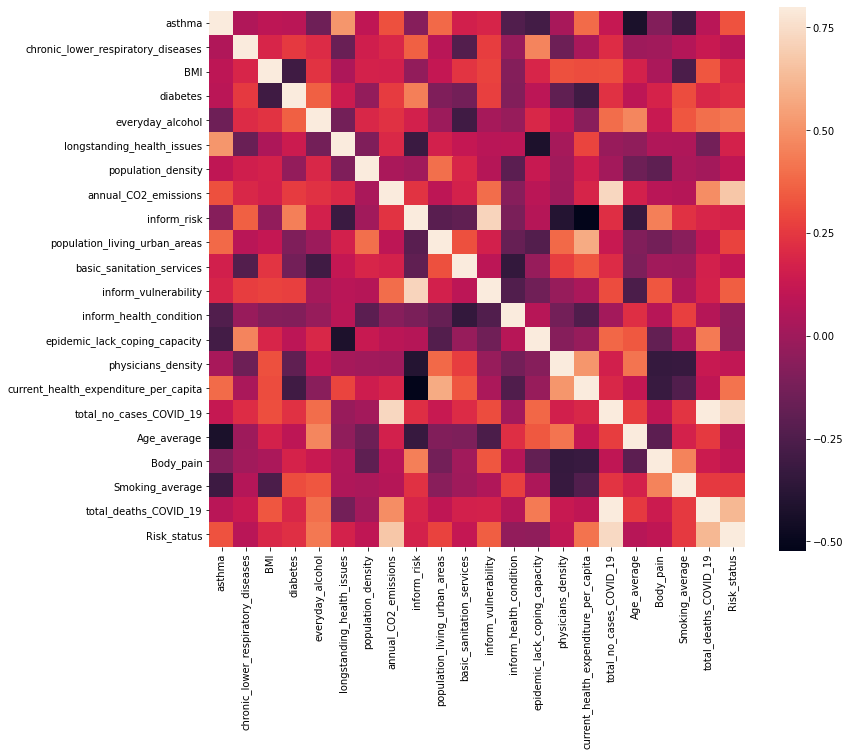

In [14]:
# Correlation matrix
import seaborn as sns

correlation_matrix = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix,vmax = 0.8, square = True)
plt.show()

In [15]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

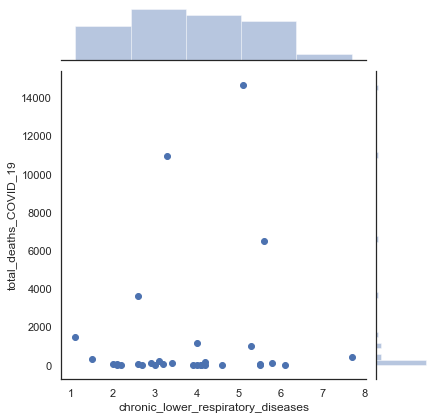

In [16]:
g = sns.jointplot(x="chronic_lower_respiratory_diseases", y="total_deaths_COVID_19", data=df)

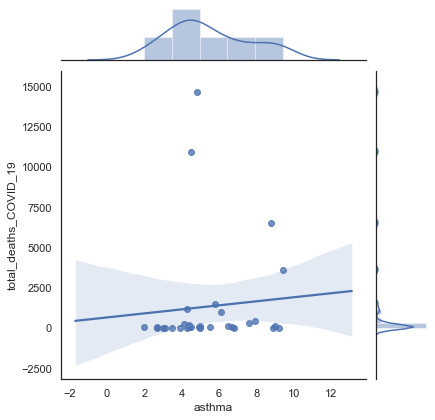

In [17]:
g = sns.jointplot("asthma", "total_deaths_COVID_19", data=df, kind="reg")

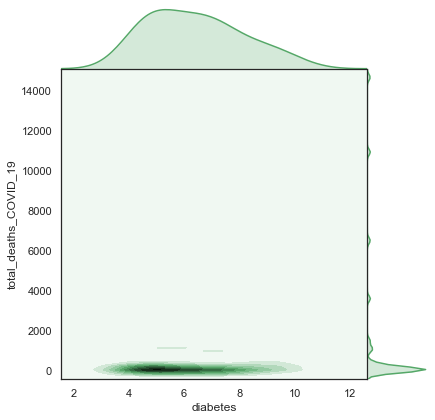

In [18]:
g = sns.jointplot("diabetes", "total_deaths_COVID_19", data= df,
                  kind="kde", space=0, color="g")

In [19]:
features = ['asthma', 'chronic_lower_respiratory_diseases', 'BMI',
       'diabetes', 'everyday_alcohol', 'longstanding_health_issues',
       'population_density', 'annual_CO2_emissions', 'inform_risk',
       'population_living_urban_areas', 'basic_sanitation_services',
       'inform_vulnerability', 'inform_health_condition',
       'epidemic_lack_coping_capacity', 'physicians_density',
       'current_health_expenditure_per_capita', 'total_no_cases_COVID_19',
       'Age_average', 'Body_pain', 'Smoking_average']


In [20]:
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Risk_status']].values

In [21]:
df['Risk_status'].replace(1, 'Low',inplace=True)
df['Risk_status'].replace(2, 'Medium',inplace=True)
df['Risk_status'].replace(3, 'High',inplace=True)

In [22]:
df.head()

,country,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,annual_CO2_emissions,inform_risk,...,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,total_no_cases_COVID_19,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
0,Austria,4.4,4.2,50.4,4.9,6.2,14.61,107.21,6.875231e+07,1.6,...,0.1,2.3,51.44,5295.18,11525,13.50,20.45,47.15,168,Medium
1,Belgium,4.3,4.0,48.8,5.3,14.2,8.22,377.21,1.178913e+08,1.9,...,0.1,1.7,33.23,4667.88,16770,13.00,24.55,47.95,1143,High
2,Bulgaria,2.7,4.6,44.6,6.4,8.9,9.02,64.70,5.198726e+07,2.4,...,0.2,3.1,39.88,1577.94,485,13.90,16.80,46.70,14,Low
3,Croatia,3.0,4.2,41.9,7.1,9.1,12.12,73.08,2.008192e+07,2.1,...,0.1,3.0,29.96,1705.21,1079,14.03,20.00,48.15,8,Low
4,Cyprus,4.3,2.1,49.2,6.1,4.2,18.58,128.71,6.967179e+06,3.0,...,0.1,1.6,19.51,2270.83,396,11.37,31.20,48.30,11,Low


In [23]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [25]:
finalDf = pd.concat([principalDf, df[['Risk_status']]], axis = 1)

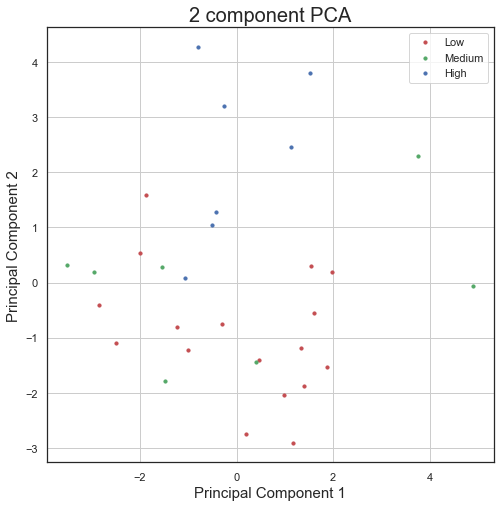

In [26]:
# Visualization of the PCA 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Low', 'Medium', 'High']
colors = ['r', 'g', 'b']
for total_deaths_COVID_19, color in zip(targets,colors):
    indicesToKeep = finalDf['Risk_status'] == total_deaths_COVID_19
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [27]:
# import the necessary packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

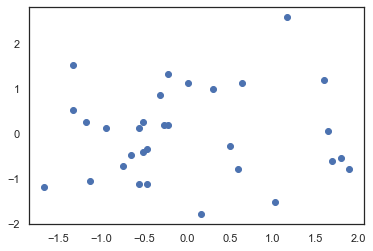

In [28]:
# Visualize true data points before the applications of K-means clustering 
plt.scatter(X[:,0],X[:,1], label='True Position')

#### K-means clustering algorithm 

In [29]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [30]:
km.labels_[:5]

array([0, 0, 1, 1, 1])

In [31]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([13, 13,  5], dtype=int64))

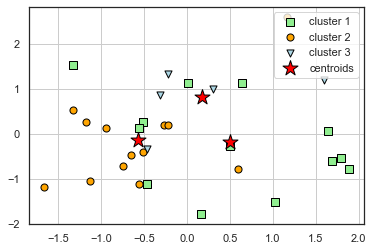

In [32]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1')

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2')

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3')

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

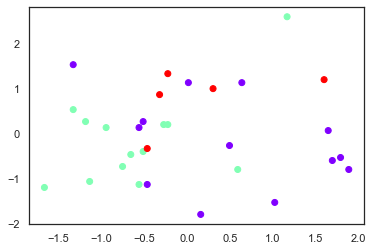

In [33]:
# Visualize the data points after applying the k-means clustering  
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow')

In [34]:
# Performing Centering of the k-means 
km.cluster_centers_

array([[ 0.50066628, -0.17829534,  0.11903133, -0.47382347, -0.1006217 ,
         0.20642485,  0.34592943, -0.22591047, -0.62666659,  0.72910778,
         0.26024528, -0.15940433, -0.34760049, -0.42391658,  0.50889035,
         0.85425384, -0.27363371, -0.18529819, -0.39504496, -0.4026251 ],
       [-0.57035827, -0.1372394 , -0.40120851,  0.09894863, -0.42982245,
        -0.29883644, -0.31189002, -0.33067702,  0.40741882, -0.67575202,
        -0.13080585, -0.04174875,  0.19570784,  0.0382668 , -0.53891621,
        -0.9056233 , -0.43782147, -0.15938845,  0.31346287,  0.20940389],
       [ 0.18119916,  0.82039034,  0.73366067,  0.97467458,  1.37915479,
         0.24027011, -0.08850247,  1.44712747,  0.57004422, -0.13872499,
        -0.33654253,  0.52299802,  0.39492089,  1.00268943,  0.07806723,
         0.13356062,  1.84978347,  0.89618527,  0.21211341,  0.50237515]])

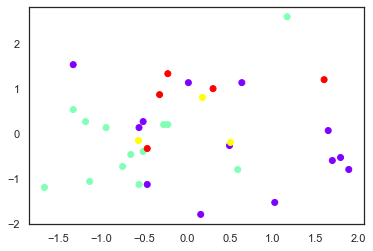

In [35]:
# Visualising the clusters after centering 
#Plot the centroid. This time we're going to use the cluster centres  

plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='yellow')

In [36]:
# Determining the exact cluster number using the silhouette elbow approach 

print('SSE %s' % km.inertia_)
print('Silhouette %s' % silhouette_score(X, km.labels_))

SSE 470.39957472060786
Silhouette 0.11760086690820012


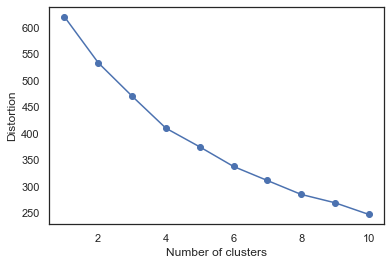

In [37]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Hierarchical Clustering of the dataset 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [72.5, 72.5, 102.5, 102.5],
  [42.5, 42.5, 87.5, 87.5],
  [20.0, 20.0, 65.0, 65.0],
  [5.0, 5.0, 42.5, 42.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [125.0, 125.0, 144.375, 144.375],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [210.0, 210.0, 240.0, 240.0],
  [190.0, 190.0, 225.0, 225.0],
  [134.6875, 134.6875, 207.5, 207.5],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [265.0, 265.0, 290.0, 290.0],
  [171.09375, 171.09375, 277.5, 277.5],
  [23.75, 23.75, 224.296875, 224.296875]],
 'dcoord': [[0.0, 3.286368989358833, 

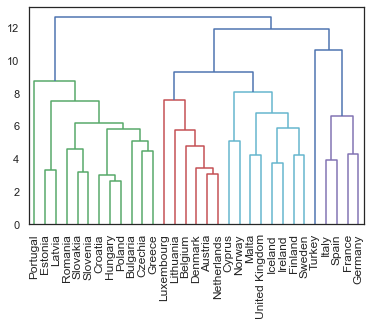

In [38]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
df = df.set_index('country')
del df.index.name

# Standardizing the features
X = StandardScaler().fit_transform(X)

# Calculate the distance between each sample
dend = hierarchy.linkage(X, 'ward')

# Plot with Custom leaves
hierarchy.dendrogram(dend, leaf_rotation=90, leaf_font_size=12, labels=df.index)


In [39]:
### Algglormerative clustering approach 

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 0, 3, 0], dtype=int64)

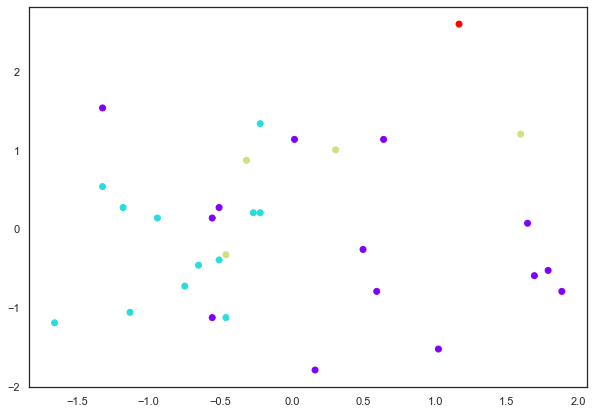

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

### Density-Based Spatial Clustering of Applications (DBSCA)

In [41]:
import numpy as np
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [42]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

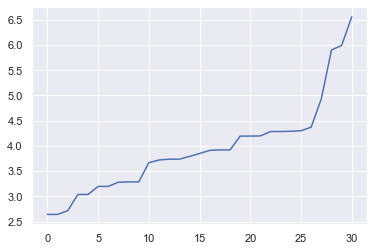

In [43]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [44]:
m = DBSCAN(eps=0.2, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [45]:
clusters = m.labels_
# Labels, note: noisy samples are given by the label -1
m.labels_[:5]

array([-1, -1, -1, -1, -1], dtype=int64)

In [46]:
# A look at the size of the clusters
np.unique(m.labels_, return_counts=True)

(array([-1], dtype=int64), array([31], dtype=int64))

In [47]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

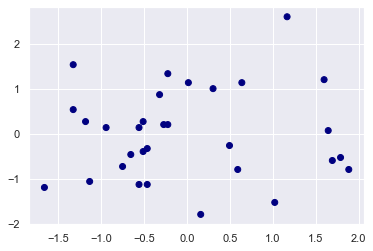

In [48]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

#### Knee Method to estimate the best eps

In [49]:
from scipy.spatial.distance import pdist, squareform

In [50]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[ 4.64462246  5.55079789  5.04401807  6.15168989  4.48735184  3.34516068
  6.11498089  5.36853809  5.99267335  5.83884135  5.29609891  5.38326616
  5.37066376  5.51102769  6.23182188  6.06644816  5.49030636  6.9927435
  6.25476049  3.03719483  5.26159155  4.49591469  8.53638486  5.58885959
  5.39883164  5.38780044  5.8262535   4.0741536   9.27706426  5.97862056
  5.80082334  5.06047715  5.62523921  4.8462535   3.79038565  6.50431038
  6.2567373   6.32599559  6.3881372   5.01498942  4.61812405  5.25053045
  6.36960062  6.00686327  6.30532274  5.20962265  5.9009756   5.17932635
  4.40802918  5.83547263  4.86726919  7.77979412  6.30152514  5.75364326
  6.14111156  4.92360518  5.79471736  8.65678364  4.82140463  4.28939934
  7.21247919  4.83548864  5.71454058  6.63231004  6.6699051   6.84038975
  7.33129397  5.01954147  5.59564333  6.51861079  5.67605456  7.20096749
  4.51924854  6.04029301  7.74284489  6.80085687  5.59298005  6.60331984
  5.52028696  6.16889709  4.70519383  5.24202714  5.

In [51]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

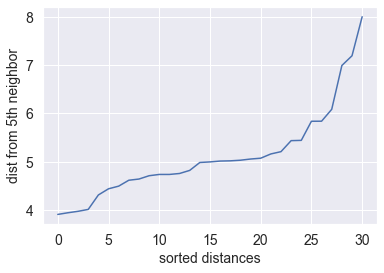

In [52]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=14)
plt.xlabel('sorted distances', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Performing Regression Analysis on the Dataset 

In [53]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Encoding qualitative data
# df = pd.get_dummies(df, columns = ['Risk_status'],drop_first = False)
# df.head(3)

In [56]:
df= df.drop(['Risk_status'], axis = 1)

### Best subset selection

In [57]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [58]:
#Initialization variables
y = df.total_deaths_COVID_19
X = df.drop(['total_deaths_COVID_19'], axis = 1)

In [59]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools

k = 7
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Could take quite awhile to complete...

#models_best = pd.DataFrame(columns=["RSS", "model"])

#tic = time.time()
#for i in range(1,44):
    #models_best.loc[i] = getBest(i)

#toc = time.time()
#print("Total elapsed time:", (toc-tic), "seconds.")